 Repetir el ejercicio anterior para la distribución de Cauchy y la exponencial.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

In [ ]:
# Generar 100 observaciones de Cauchy(0, 1)
mu = 0      # media
sigma = 1   # desviacion standar
n = 100     # cantidad  de muestras

n_sims = 1_000

func_contenida = 0
for i in range(0, n_sims):
    cauchy_samples = stats.cauchy.rvs(loc=mu, scale=sigma, size=n)
    
    # estimacion cdf Cauchy con las 100 muestras
    F_hat = stats.ecdf(cauchy_samples)
    x = F_hat.cdf.quantiles
    F = F_hat.cdf.probabilities

    alpha = 0.05
    low,up = confidence_interval_dkw(F_hat.cdf, alpha=alpha)
    
    # comparo cada punto con la verdadera CDF Cauchy
    cdf_cauchy = stats.cauchy.cdf(x)
    dentro_intervalo = np.all((cdf_cauchy >= low) & (cdf_cauchy <= up))
    
    func_contenida += dentro_intervalo

#print(F)

proporcion_cobertura = func_contenida / n_sims
print("Proporción de veces que el intervalo cubre la verdadera FDA:", proporcion_cobertura)

Proporción de veces que el intervalo cubre la verdadera FDA: 0.961


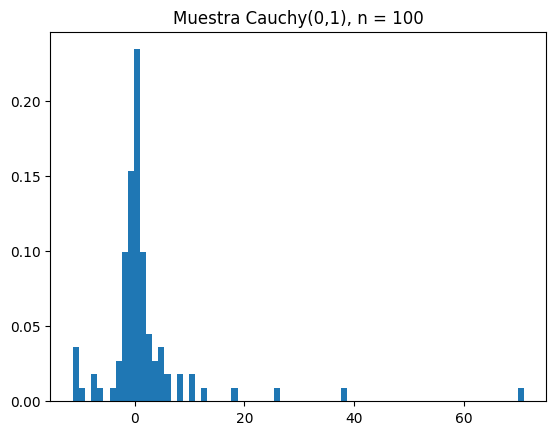

In [11]:
cauchy_samples = stats.cauchy.rvs(loc=mu, scale=sigma, size=n)

plt.hist(cauchy_samples, density=True, bins='auto')
plt.title('Muestra Cauchy(0,1), n = {}'.format(n))
plt.show()

In [13]:
# Generar 100 observaciones de Exp(0, 1)
mu = 0      # media
sigma = 1   # desviacion standar
n = 100     # cantidad  de muestras


func_contenida = 0
for i in range(0, n_sims):
    expon_samples = stats.expon.rvs(loc=mu, scale=sigma, size=n)
    
    # estimacion cdf exp con las 100 muestras
    F_hat = stats.ecdf(expon_samples)
    x = F_hat.cdf.quantiles
    F = F_hat.cdf.probabilities

    alpha = 0.05
    low,up = confidence_interval_dkw(F_hat.cdf, alpha=alpha)
    
    # comparo cada punto con la verdadera CDF exponencial
    cdf_expon = stats.expon.cdf(x)
    dentro_intervalo = np.all((cdf_expon >= low) & (cdf_expon <= up))
    
    func_contenida += dentro_intervalo

#print(F)

proporcion_cobertura = func_contenida / n_sims
print("Proporción de veces que el intervalo cubre la verdadera CDF:", proporcion_cobertura)

Proporción de veces que el intervalo cubre la verdadera CDF: 0.957


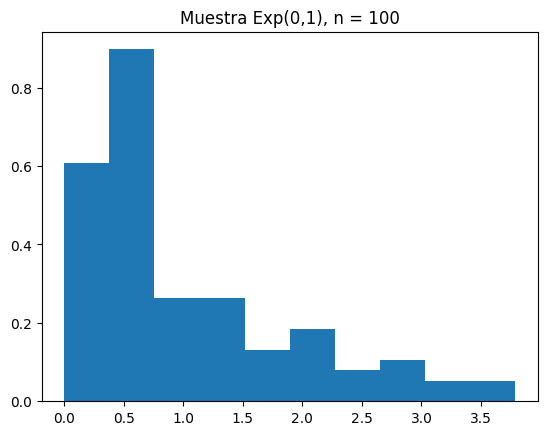

In [15]:
expon_samples = stats.expon.rvs(loc=mu, scale=sigma, size=n)
    
plt.hist(expon_samples, density=True, bins='auto')
plt.title('Muestra Exp(0,1), n = {}'.format(n))
plt.show()